# Econometría básica con Python
## Regresión Lineal por Mínimos Cuadrados Ordinarios

**Fabián Alejandro Triana Alarcón**

fatrianaa1@gmail.com / fatrianaa@unal.edu.co

Economista. Estudiante de Especialización en Estadística

Universidad Nacional de Colombia

## Análisis de Regresión:

El análisis de regresión trata del estudio de la dependencia de una variable (variable dependiente)
respecto de una o más variables (variables explicativas) con el objetivo de estimar o predecir la
media o valor promedio poblacional de la primera en términos de los valores conocidos o fijos (en
muestras repetidas) de las segundas. (Gujarati y Porter, 2010, p.15)

En términos simples, el análisis de regresión estudia la relación que existe entre la variable dependiente y
la(s) variable(s) explicativa(s). Para el caso de la regresión lineal, tal relación puede ser expresada como una
función lineal en los parámetros, pero ¿de qué parámetros se está hablando?

Para resolver el anterior interrogante, lo primero que se hará será considerar una regresión bivariada, en la cual la variable dependiente (que se identifica con $y$) puede ser expresada como una función (con linealidad en los parámetros) de la variable explicativa (que se identifica con $x$). Concretamente:

$$y_i=\beta_0+\beta_1x_i+u_i$$

Esta expresión corresponde a la Función de Regresión Poblacional (FRP) (Gujarati y Porter, 2010) y los
parámetros a los que se ha hecho referencia son simplemente los $\beta_i$; como podemos ver, estos $\bf{\beta}$ no se ven
afectados por algún tipo de transformación que modifique su relación lineal con la variable dependiente: a esto es que se hace referencia con linealidad en los parámetros, la cual, no necesariamente debe aplicar a las variables
explicativas (Greene, 2003; Gujarati y Porter, 2010). En cuanto a $u$, ésta corresponde al término de error, el cual
recoge el efecto de las variables no incluidas explícitamente en el modelo y que afectan $y$.

Ahora, en la práctica se desconoce la Función de Regresión Poblacional, por lo que se recurre a la Función
de Regresión Muestral (FRM) como una aproximación a esta:

$$y_i=\hat{\beta_0}+\hat{\beta_1}x_i+\hat{u_i}$$

Esta expresión es muy parecida a la de la Función de Regresión Poblacional, pero presenta una diferencia
fundamental: los términos de la Función de Regresión Muestral tienen correspondencia directa con los términos
incluidos en la expresión de la Función de Regresión Poblacional, pero no son exactamente los mismos, en
cuanto se trata de sus **estimadores**. Así, el estimador del parámetro $k$ se identifica como $\hat{k}$.

Para realizar la estimación, es frecuente el uso de dos métodos: **Mínimos Cuadrados Ordinarios** y **Máxima
Verosimilitud**. El método de Mínimos Cuadrados Ordinarios, o MCO, es el más común y tiende a ser abordado
como tema fundamental en los cursos de econometría a nivel introductorio.

La idea general del método de MCO es, básicamente, minimizar la suma de los residuos (termino $\hat{u}$ en la Función de Regresión Muestral) cuadrados. Para el caso de una regresión bivariada, lo que se busca con el método MCO es el menor valor posible de $\sum_{i=1}^n\hat{u_i}^2$, teniendo en cuenta que:

$$\sum_{i=1}^n\hat{u_i}^2=\sum_{i=1}^n(y_i-\hat{\beta_0}-\hat{\beta_1}x_i)^2$$

Así, los estimadores $\hat{\beta_0}$ y $\hat{\beta_1}$ con los que se halla la menor suma de los residuos al cuadrado son los estimadores MCO, los cuales, con el cumplimiento de un conjunto de supuestos específicos, evidencian propiedades estadísticas muy atractivas.

## Regresión lineal simple:
Una regresión lineal simple es en la que únicamente se tiene una variable explicativa (solo hay una variable $x$). Para llevar a cabo la regresión lineal simple, utilizaremos el mismo dataset del capítulo previo (el cual corresponde al Ejemplo 7.1, *Mortalidad infantil en relación con el PIB per cápita y la tasa de alfabetización de las mujeres*, de Gujarati y Porter (2010)) y requeriremos de las mismas herramientas empleadas en éste, por lo que procederemos a importar las respectivas librerías y los datos:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("GujaratiPorter71.txt", 
                   sep = " ", delimiter="\t")

El `DataFrame` contiene información de las siguientes variables:

* **CM**. Esta variable hace referencia a *Child Mortality* y corresponde a la mortalidad infantil. Se trata del número de fallecimientos, en un año, de niños con una edad inferior a 5 años por cada 1000 nacidos vivos.

* **FLR**. Esta variable hace referencia a *Female Literacy Rate* y corresponde a la tasa de alfabetización de las mujeres.

* **PGNP** hace referencia a *Per cápita Gross National Product* y corresponde al PIB per cápita en 1980.

* **TFR** hace referencia a *Total Fertility Rate* y corresponde a la tasa de fecundidad total.

En la regresión lineal simple que se adelantará, la variable dependiente será "CM" (mortalidad infantil) y
la variable explicativa será "PGNP" (PIB per cápita).

Se procederá a examinar visualmente la relación que existe entre las variables de interés. Para esto, se construirá un diagrama de dispersión (*scatterplot*) con el uso del método `.scatter()`, aplicado a un `Axes` de *Matplotlib*. El código a emplear es el siguiente:

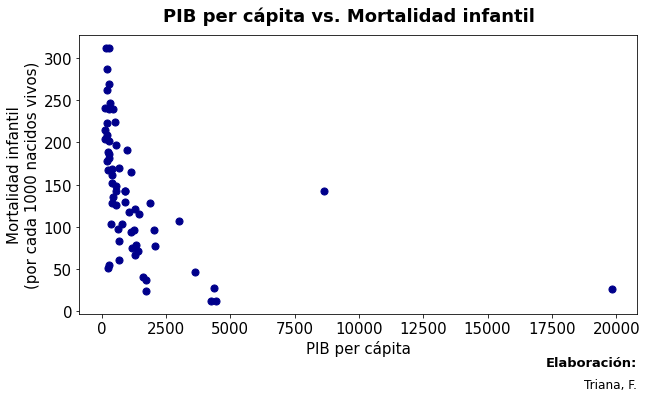

In [3]:
fig, ax = plt.subplots(figsize = (10, 5))
fig.suptitle("PIB per cápita vs. Mortalidad infantil", fontsize = 18, 
             fontweight = "bold")
ax.scatter(x = data["PGNP"], y = data["CM"], s = 50, color = "darkblue")
ax.set_xlabel("PIB per cápita", fontsize = 15)
ax.set_ylabel("Mortalidad infantil\n(por cada 1000 nacidos vivos)", 
           fontsize = 15)
plt.subplots_adjust(top=0.9)
plt.tick_params(labelsize = 15)
fig.text(.9,-.02,
         "Elaboración:",
          fontsize = 13, fontweight = "bold", 
         ha = "right")
fig.text(.9,-.08,
         "Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

A partir del gráfico se puede observar que la relación entre las variables es aparentemente negativa. Sin
embargo, esto tan solo es una impresión que se genera a partir de la observación y puede ser errada, razón por
la cual se examinará cuantitativamente dicha relación buscando comprobar si la conjetura es correcta; para tal
propósito se llevará a cabo una regresión lineal por el método de MCO.

Para crear el modelo, se emplea la función `OLS(...)` de *Statsmodels.api*. Los argumentos que se incluyen corresponden, respectivamente, a la variable dependiente y a la variable explicativa. El resultado será asignado a un objeto que se denominará `MiModeloSimple`:

In [4]:
MiModeloSimple = sm.OLS(data["CM"], data["PGNP"])

El modelo ya ha sido creado, es decir, ya se ha definido su estructura; sin embargo, aún no se ha llevado a cabo ninguna estimación a partir de éste. Para efectuar la estimación se recurrirá al método `.fit()` y se
almacenarán los resultados generados en un objeto al que se denominará `ResultadosSimple`:

In [5]:
ResultadosSimple = MiModeloSimple.fit()

Al ejecutar esta línea de código no se obtiene algún resultado visible. Esto se debe a que lo que se ha conseguido con la ejecución es guardar los resultados generados en un objeto, sin indicar la realización de
alguna acción en particular con dicho objeto. Ahora, si se desea visualizar los resultados del modelo, puede simplemente usarse la función integrada `print(...)`, empleando como argumento la aplicación del método `.summary()` sobre el objeto que almacena los resultados de dicho modelo. Así:

In [6]:
print(ResultadosSimple.summary())

                                 OLS Regression Results                                
Dep. Variable:                     CM   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              3.710
Date:                Sun, 24 Jan 2021   Prob (F-statistic):                      0.0586
Time:                        18:13:54   Log-Likelihood:                         -413.92
No. Observations:                  64   AIC:                                      829.8
Df Residuals:                      63   BIC:                                      832.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Lo que se obtiene con la ejecución del código es un resumen de la instancia de resultados en el que se presenta la información más relevante acerca de estos: en la parte superior se incluye el método de estimación empleado, el número de observaciones, los grados de libertad (de los residuos y del modelo) y el $R^2$ (estándar
y ajustado), entre otros datos relevantes. En la sección del medio se encuentran los coeficientes, junto a sus respectivos errores estándar, estadísticos $t$ e intervalos de confianza. En la última sección están las advertencias, las cuales resultan, frecuentemente, muy útiles y pueden ayudar a identificar potenciales problemas.

Se puede observar que el coeficiente de la variable explicativa es positivo, lo que contradice la conclusión visual de que la relación, aparentemente, era negativa; algo que resulta, además, poco lógico, pues se esperaría que los países con ingreso *per cápita* más alto tuvieran una tasa de mortalidad infantil menor. Ante esta situación extraña vale la pena preguntarse sobre su causa: ¿cómo puede explicarse tal inconsistencia? La respuesta es extremadamente simple: para este modelo solo se ha calculado el coeficiente correspondiente a la variable "PGNP" y no se ha considerado la existencia del parámetro de intercepto, es decir, se ha llevado a cabo una regresión *a través del origen* (una regresión que no tiene $\beta_0$)

La función `OLS(...)` de *Statsmodels.api* no asume por defecto que el modelo a estimar incluye una constante como variable explicativa y, por tanto, no realiza la estimación del coeficiente correspondiente al parámetro de intercepto. Para conseguir la estimación de dicho parámetro es necesario especificar que una constante debe
añadirse al conjunto de variables explicativas del modelo; esto se logra, por ejemplo, empleando la función `add_constant(...)` de *Statsmodels.api*, tomando como argumento el objeto correspondiente a las variables explicativas incluidas. Así:

In [7]:
MiModeloSimple2 = sm.OLS(data["CM"], sm.add_constant(data["PGNP"]))

Para realizar la estimación y visualizar los resultados correspondientes, basta con repetir la misma estructura de los códigos empleados previamente (en el caso del modelo sin término del intercepto). Así:

In [8]:
ResultadosSimple2 = MiModeloSimple2.fit()
print(ResultadosSimple2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           0.000826
Time:                        18:13:54   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4244      9.846     15.989      0.0

Ahora, se puede observar que el coeficiente correspondiente a la variable explicativa es negativo, tal y como se había presumido en el examen visual, y que ésta es estadísticamente significativa. Lo que se hará enseguida es graficar los valores originales y los valores estimados por el modelo, de modo que puedan contrastarse y sea posible un examen visual de la bondad de ajuste de éste. Para esto, nuevamente se hará uso del método `.scatter(...)` aplicado sobre un `Axes` de *Matplotlib*.

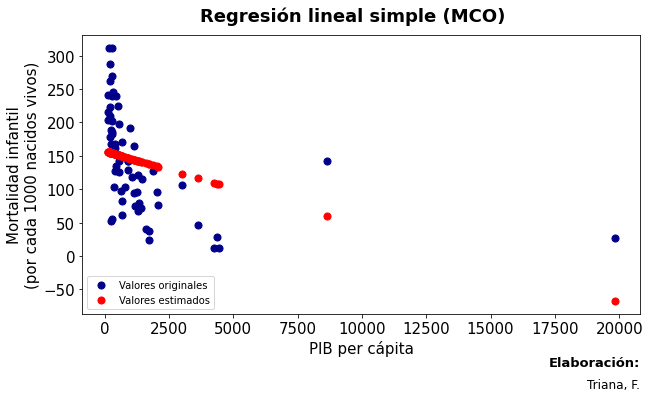

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Regresión lineal simple (MCO)", fontsize = 18,
             fontweight = "bold")
ax.scatter(data["PGNP"], data["CM"], s = 50, 
           label = "Valores originales",
           color = "darkblue")
ax.scatter(data["PGNP"], ResultadosSimple2.predict(), s = 50,
           label = "Valores estimados",
           color = "red")
ax.set_xlabel("PIB per cápita", fontsize = 15)
ax.set_ylabel("Mortalidad infantil\n(por cada 1000 nacidos vivos)", 
           fontsize = 15)
ax.legend(frameon = True, loc = "lower left")
plt.subplots_adjust(top=0.9)
plt.tick_params(labelsize = 15)
fig.text(.9,-.02,
         "Elaboración:",
          fontsize = 13, fontweight = "bold",
        ha = "right")
fig.text(.9,-.08,
         "Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

Se observa que la bondad de ajuste del modelo no es la mejor. ¿A qué se debe este resultado desalentador?
Si se  examina el gráfico anterior se puede notar que la parte correspondiente a los datos originales presenta un muy ligero parecido con el gráfico de una función de la forma $y = f(x) = \frac{a}
{x}$, con $a > 0$, $x > 0$ y representación del valor de $x$ en el eje de las abscisas y del valor de $y$ en el eje de las ordenadas. Este parecido sugiere que la forma funcional $y_i = \beta_0 + \beta_1x_i + u_i$ tal vez no sea la más adecuada para modelar una relación con estos datos, en cuanto $y$ puede asemejarse más a una función de $x$ de la forma $f(x) = \frac{a}{x}$ 
$(a \neq 0)$ que a una de la forma $f(x) = ax$ $(a \neq 0)$. Teniendo en cuenta esto, tal vez la forma $y_i = \beta_0 + \beta_1\frac{1}{x_i}+ u_i$ genere mejores resultados.

Para trabajar con un modelo recíproco se debe tener en cuenta que la estimación no se hará a partir de los valores de $x$ sino de los valores de $\frac{1}{x}$. Evidentemente, esto implica que el modelo es no lineal en la variable $x$, pero, ¿esto significa que lo que se llevará a cabo es una regresión no lineal? La respuesta es no. Aunque el
modelo ya no es lineal en la variable $x$, se debe recordar que la linealidad considerada hace referencia a los parámetros y no a las variables, por lo cual, a pesar de la no linealidad de la variable, sigue tratándose de un modelo de regresión lineal, en cuanto la linealidad en los parámetros no se ha visto afectada.

Aunque se desconocen los valores de $\frac{1}{PGNP}$, aún se tiene la posibilidad de obtenerlos en tanto los valores de $PGNP$ son conocidos y tan solo se debe realizar una operación matemática sencilla. El cálculo de estos valores, a pesar de ser simple, puede resultar tedioso dada la cantidad de los mismos y puede llevar a cometer
errores si se ejecuta de forma "manual"; por fortuna, *pandas* resulta muy útil en este contexto, pues evita la realización de tal labor "manual" para el cálculo de cada uno de los valores, al permitir aplicar operaciones matemáticas básicas de Python que permiten obtener el resultado fácilmente.

Se creará la variable correspondiente al recíproco de la variable original, ya que ésta no hace parte del dataset. Para crear dicha variable, simplemente se realiza una asignación a una `Series` de *pandas*, señalando el nombre del `DataFrame` correspondiente y, a continuación, especificando el nombre que quiere darse a la
variable nueva (escrito entre comillas) dentro de corchetes [ ]. Así:

In [10]:
data["1/PGNP"] = 1/data["PGNP"]

Se verifica la correcta ejecución del proceso, recurriendo al método `.head()`:

In [11]:
data.head()

,CM,FLR,PGNP,TFR,1/PGNP
0,128,37,1870,6.66,0.000535
1,204,22,130,6.15,0.007692
2,202,16,310,7.00,0.003226
3,197,65,570,6.25,0.001754
4,96,76,2050,3.81,0.000488


Ahora, estimaremos el modelo $y_i = \beta_0 + \beta_1\frac{1}
{x_i}+ u_i$, teniendo en cuenta que $\frac{1}{x}$ corresponde a la variable recién creada "1/PGNP", y observaremos si se genera una mejora en el ajuste respecto al obtenido con la estimación de $y_i = \beta_0 + \beta_1x_i + u_i$. Para la construcción y estimación del modelo y visualización de los resultados, emplearemos, nuevamente, la función `OLS(...)` de *Statsmodels.api* y los métodos `.fit()` y `.summary()`:

In [12]:
MiModeloSimple3 = sm.OLS(data["CM"], sm.add_constant(data[["1/PGNP"]]))
ResultadosSimple3 = MiModeloSimple3.fit()
print(ResultadosSimple3.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           7.82e-10
Time:                        18:13:54   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7944     10.832      7.551      0.0

Ahora, procedemos a graficar los valores originales y los valores estimados, usando el método
`.scatter(...)` de un `Axes` de *Matplotlib*, de modo que podamos observar si efectivamente se genera una
mejora en el ajuste:

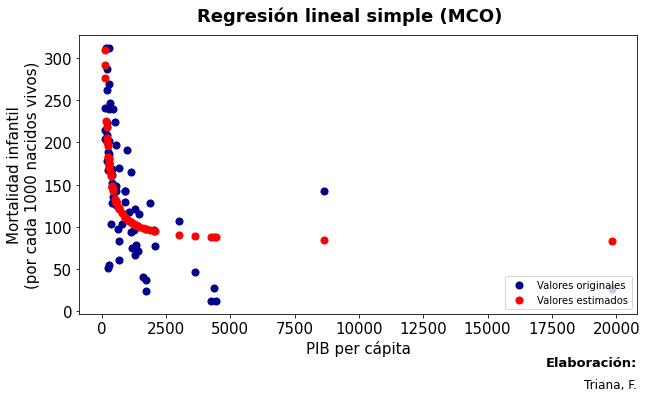

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Regresión lineal simple (MCO)", fontsize = 18,
            fontweight = "bold")
ax.scatter(data["PGNP"], data["CM"], s = 50, 
           label = "Valores originales",
           color = "darkblue")
ax.scatter(data["PGNP"], ResultadosSimple3.predict(), s = 50,
           label = "Valores estimados",
           color = "red")
ax.set_xlabel("PIB per cápita", fontsize = 15)
ax.set_ylabel("Mortalidad infantil\n(por cada 1000 nacidos vivos)", 
           fontsize = 15)
ax.legend(frameon = True, loc = "lower right")
plt.subplots_adjust(top=0.9)
plt.tick_params(labelsize = 15)
fig.text(.9,-.02,
         "Elaboración:",
         fontsize = 13, fontweight = "bold",
         ha = "right")
fig.text(.9,-.08,
         "Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

Como podemos observar, se presenta una mejora clara, en cuanto el ajuste parece ser más adecuado; la mejora es visualmente evidente, sin embargo, también se ha presentado un incremento apreciable del coeficiente de determinación, o $R^2$, el cual ha pasado de 0.166 a 0.459, como se puede comprobar en las tablas de
resumen de cada regresión. Así, para este caso particular, la forma funcional del modelo recíproco parece ser
más apropiada que la forma funcional tradicional.

## Referencias:

Gujarati, D.N. y Porter, D.C. (2010). *Econometría*. México: McGraw-Hill/Interamericana Editores, S.A. de C.V.

Greene, W.H. (2003). *Econometric Analysis*. New Jersey, Estados Unidos: Pearson Education, Inc.